In [1]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os
import tarfile
import urllib.request
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler

def fetch_housing_load_housing_data(housing_url="https://raw.githubusercontent.com/rickiepark/handson-ml2/master/" +
                                    "datasets/housing/housing.tgz", housing_path=os.path.join("datasets", "housing")):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()
    return pd.read_csv(os.path.join(housing_path, "housing.csv"))

In [4]:
#데이터
housing = fetch_housing_load_housing_data()

#전처리
ordinal_encoder = OrdinalEncoder()
housing[["ocean_proximity"]] = ordinal_encoder.fit_transform(housing[["ocean_proximity"]])
housing.dropna(axis = 0, inplace = True,)

#데이터 셋 분할
X_train, X_test, y_train, y_test = train_test_split(housing.drop("median_house_value", axis=1),housing["median_house_value"].copy(), test_size=0.2, random_state=42)


#예측
clf_linear = LinearRegression()
clf_linear.fit(X_train, y_train)
pred_linear = clf_linear.predict(X_test)

#평가
mse = mean_squared_error(y_test, pred_linear)
print(np.sqrt(mse))

70171.99539639728


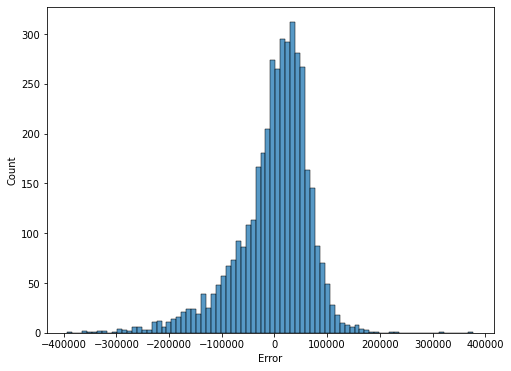

In [5]:
resid = pred_linear - y_test
plt.figure(figsize= (8, 6))
sns.histplot(resid)
plt.xlabel('Error');